In [1]:
import pandas as pd

dataset = pd.read_csv("dataset_final.csv", index_col=0)

X = dataset.drop(columns=["valve_optimal"])
y = dataset["valve_optimal"]

X_train = X.iloc[:2000]
y_train = y.iloc[:2000]

X_test = X.iloc[2000:]
y_test = y.iloc[2000:]

# Vérifications
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

print("\nRépartition des classes (train) :")
print(y_train.value_counts())

print("\nRépartition des classes (test) :")
print(y_test.value_counts())

X_train : (2000, 42)
y_train : (2000,)
X_test  : (205, 42)
y_test  : (205,)

Répartition des classes (train) :
valve_optimal
1    1052
0     948
Name: count, dtype: int64

Répartition des classes (test) :
valve_optimal
0    132
1     73
Name: count, dtype: int64


In [2]:
# Correction des NaN
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("X_train_scaled :", X_train_scaled.shape)
print("X_test_scaled  :", X_test_scaled.shape)

X_train_scaled : (2000, 42)
X_test_scaled  : (205, 42)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

print("Accuracy TRAIN :", accuracy_score(y_train, y_train_pred))
print("Accuracy TEST  :", accuracy_score(y_test, y_test_pred))

print("\nClassification report (TEST) :")
print(classification_report(y_test, y_test_pred))


C:\Users\boudi\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\boudi\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Program Files\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Program Files\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Accuracy TRAIN : 0.916
Accuracy TEST  : 0.6292682926829268

Classification report (TEST) :
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       132
           1       0.48      0.44      0.46        73

    accuracy                           0.63       205
   macro avg       0.59      0.59      0.59       205
weighted avg       0.62      0.63      0.63       205



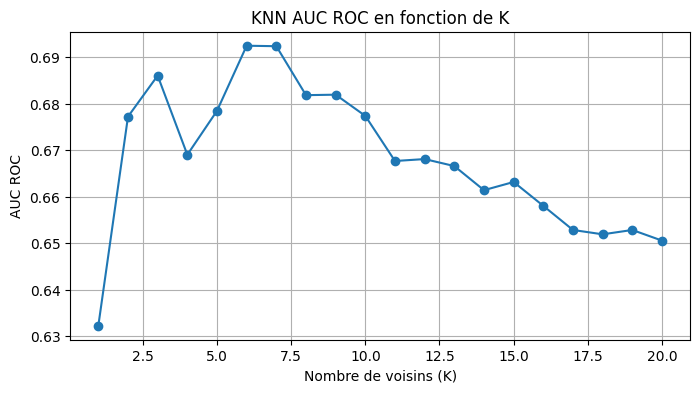

Meilleur K : 6
Meilleure AUC : 0.6924553756745537


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

k_values = range(1, 21)
auc_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Probabilités classe 1
    y_proba = knn.predict_proba(X_test_scaled)[:, 1]

    # AUC
    auc = roc_auc_score(y_test, y_proba)
    auc_scores.append(auc)

plt.figure(figsize=(8, 4))
plt.plot(k_values, auc_scores, marker="o")
plt.xlabel("Nombre de voisins (K)")
plt.ylabel("AUC ROC")
plt.title("KNN AUC ROC en fonction de K")
plt.grid(True)
plt.show()

# Meilleur K
best_k = k_values[np.argmax(auc_scores)]
best_auc = max(auc_scores)

print("Meilleur K :", best_k)
print("Meilleure AUC :", best_auc)